In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/50_Startups.csv')

In [4]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
17,94657.16,145077.58,282574.31,New York,125370.37
19,86419.70,153514.11,0.00,New York,122776.86
34,46426.07,157693.92,210797.67,California,96712.80
37,44069.95,51283.14,197029.42,California,89949.14
2,153441.51,101145.55,407934.54,Florida,191050.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()   # how data looks like mathematically

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**finding about inout and output columns**

Feature

R&D Spend | float | Research and Devlopment Expenses

Administration | float | Administration cost

Marketing Spend | float | Marketing Expenses

State | Object | states like New York, California and Florida

Label

Profit | float | Profit in startup

**EDA**

Find Unwanted Columns

Find Missing Values

Find Features with one value

Explore the Categorical Features

Find Categorical Feature Distribution

Relationship between Categorical Features and Label

Explore the Numerical Features

Find Discrete Numerical Features

Relation between Discrete numerical
Features and Labels

Find Continous Numerical Features

Distribution of Continous Numerical Features

Relation between Continous numerical Features and Labels

Find Outliers in numerical features

Explore the Correlation between numerical features


In [7]:
# 2.finding missinng values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [8]:
# 3. finding the quantity of categorical value
for column in df.columns:
    print(column,df[column].nunique())

R&D Spend 49
Administration 50
Marketing Spend 48
State 3
Profit 50


Exploring categorical values


In [9]:
# 4. exploring categorical feature
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['State']

In [10]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is State and number of categories are 3


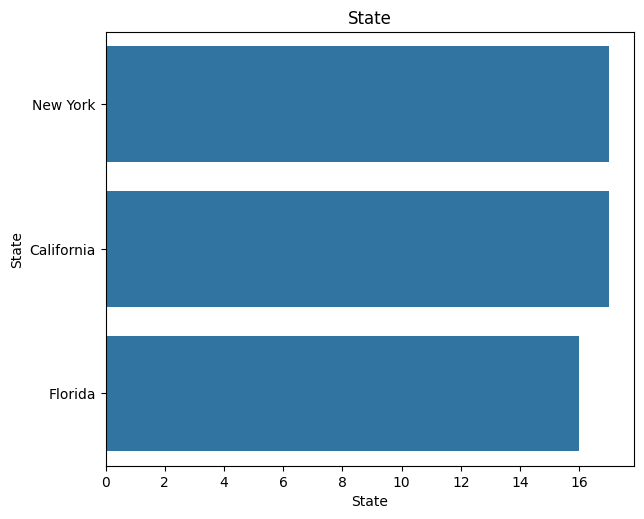

In [11]:
# 5. find categorical feature distribution
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

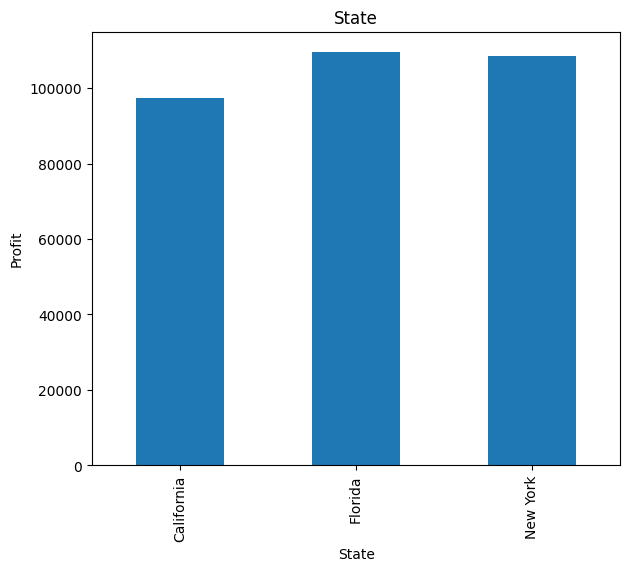

In [12]:
# 6. relationship between categorical feature and label
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    data=df.copy()
    data.groupby(feature)['Profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plotnumber+=1
plt.show()

In [13]:
# 8. explore numerical feature
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Profit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  3


,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [14]:
# 9 . discrete numerical feature
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [15]:
# 10. continuous numericlaa feature
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Profit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


In [16]:
continuous_features

['R&D Spend', 'Administration', 'Marketing Spend']

<ipython-input-17-e03e04a92e37>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-17-e03e04a92e37>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-17-e03e04a92e37>:7: UserWarning: 

`distplot` is a deprecated function 

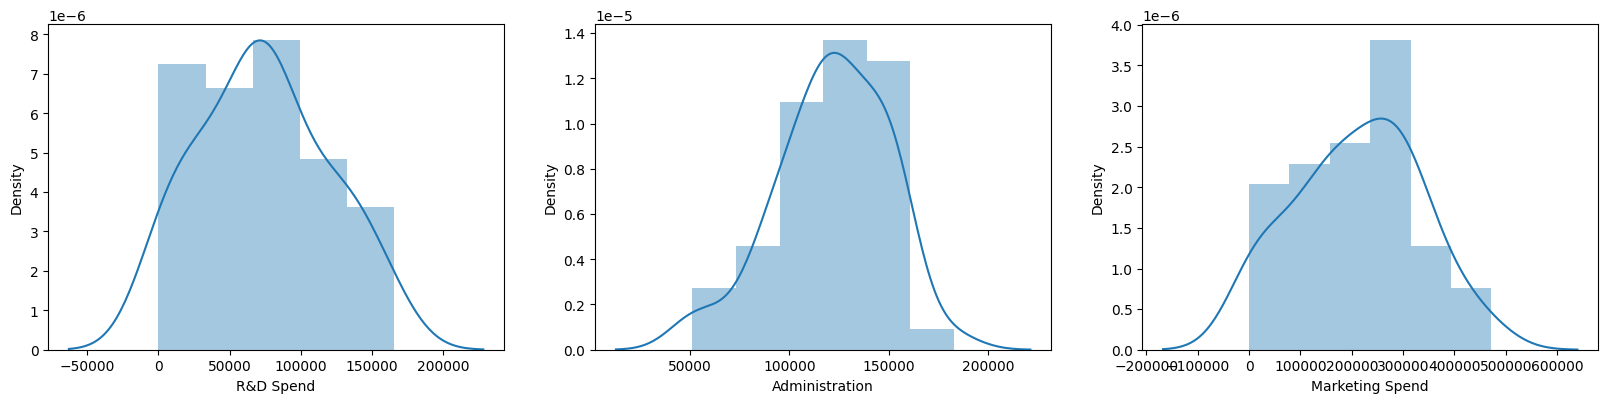

In [17]:
#11. distribution of continuos numerical feature
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

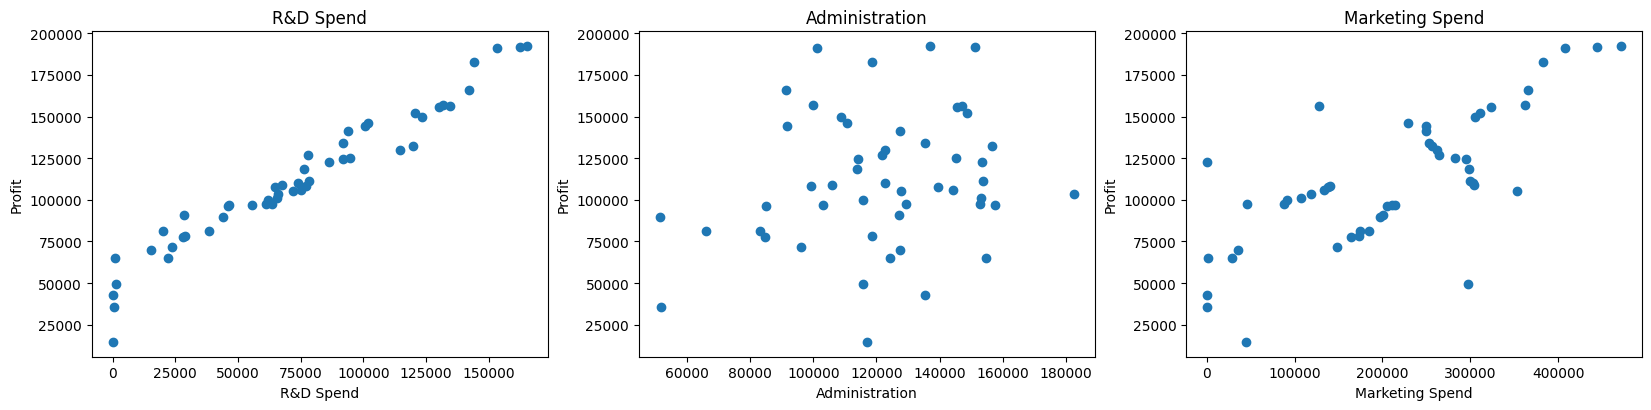

In [18]:
# 12. relation between continuous numerical feature and labels
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['Profit'])
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plotnumber+=1
plt.show()

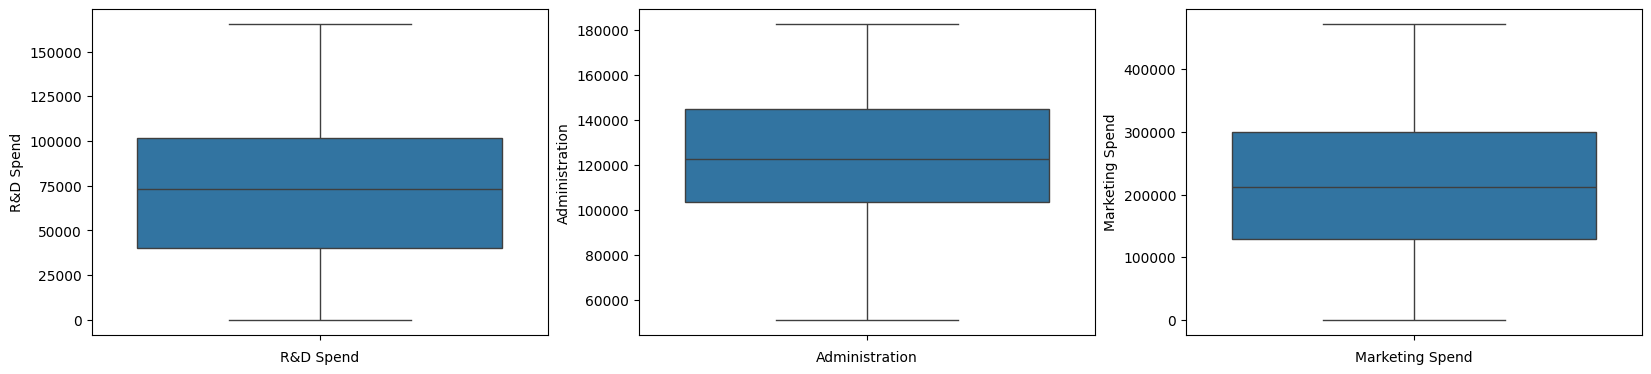

In [19]:
# 13. find outliers in numerical feature
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

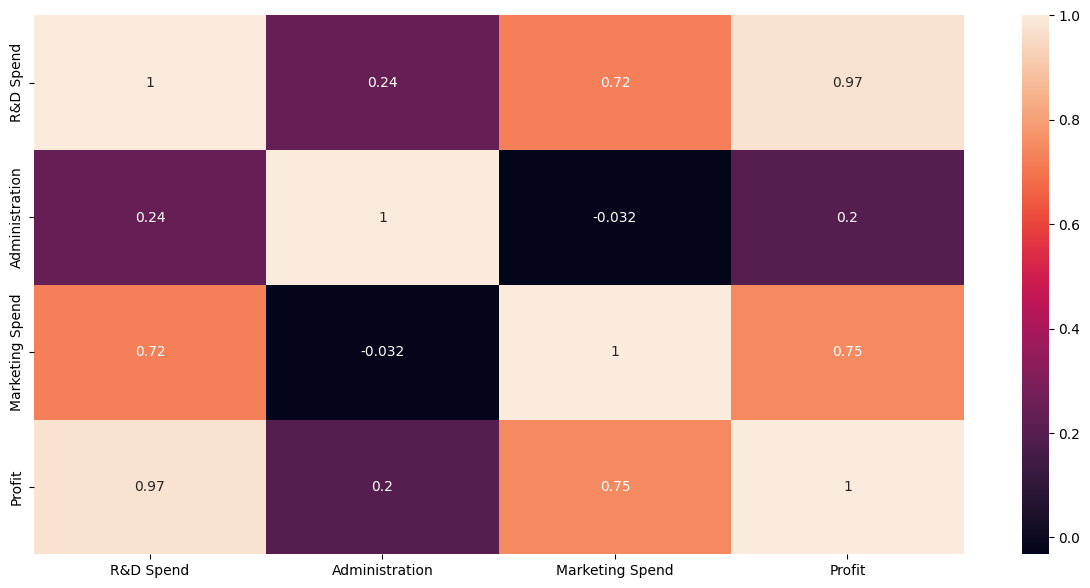

In [20]:
# 14. Explore correlation between numerical feature
# Exclude non-numeric columns before calculating correlation
cor_mat = df.select_dtypes(include=np.number).corr()
fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True)
plt.show()

**Feature Engineering and Model Building **

Drop unwanted Features

Handle Missing Values

Handle Categorical Features

Handle Feature Scalling

Remove Outliers

In [21]:
# Handle Categorical Features
state_dummies = pd.get_dummies(df['State'],prefix='state',drop_first=True)
df = pd.concat([df,state_dummies],axis=1)

In [22]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,True
1,162597.70,151377.59,443898.53,California,191792.06,False,False
2,153441.51,101145.55,407934.54,Florida,191050.39,True,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,True,False


In [23]:
df.drop(['State'], axis=1, inplace=True)

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


split dataset into training set and test set  

In [25]:
X = df.drop(['Profit'],axis=1)
y = df['Profit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [26]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,state_Florida,state_New York
33,55493.95,103057.49,214634.81,True,False
35,46014.02,85047.44,205517.64,False,True
26,75328.87,144135.98,134050.07,True,False
34,46426.07,157693.92,210797.67,False,False
18,91749.16,114175.79,294919.57,True,False


In [27]:
len(X_train)

40

In [28]:
len(X_test)

10

Model Selection

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [32]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                # 'normalize': [True, False], # Remove or comment out this line
                'copy_X': [True, False],
                'positive': [True, False] #Only include valid parameters
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [33]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.932611,"{'copy_X': True, 'fit_intercept': True, 'positive': True}"
1,lasso,0.922115,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.887289,"{'criterion': 'friedman_mse', 'splitter': 'random'}"


Model Building

In [36]:
model_lr = LinearRegression(copy_X=True, fit_intercept=True)

In [38]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [39]:
model_lr.score(X_test,y_test)

0.9347068473282423

In [40]:
y_pred= model_lr.predict(X_test)

In [41]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [42]:
y_test

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


accuracy_score function from sklearn.metrics is designed for classification tasks, where the target variable (y) consists of discrete classes or labels. However, in this case, the target variable 'Profit' is a continuous numerical variable, making accuracy_score inappropriate.

accuracy_score expects discrete class labels for both y_true (actual values) and y_pred (predicted values) to calculate the proportion of correctly classified instances. Since your target variable 'Profit' is continuous, the function cannot perform this calculation and raises the ValueError.

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 83502864.03257766
R-squared: 0.9347068473282423


In [43]:
X.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'state_Florida',
       'state_New York'],
      dtype='object')

In [44]:
np.where(X.columns=='state_'+str('New York'))[0][0]

np.int64(4)

In [45]:
def predict_profit(r_d_expenses,administration_expenses,marketing_expenses,state):
    state_index = np.where(X.columns=='state_'+str(state))[0][0]

    x = np.zeros(len(X.columns))
    x[0] = r_d_expenses
    x[1] = administration_expenses
    x[2] = marketing_expenses
    if state_index >= 0:
        x[state_index] = 1

    return model_lr.predict([x])[0]


In [46]:
predict_profit(55493.95,103057.49,214634.81,'New York')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(97423.07641753656)

Save Model

In [51]:
import pickle
pickle.dump(model_lr,open('profit_prediction_model.pkl','wb'))

In [52]:
X.head()

,R&D Spend,Administration,Marketing Spend,state_Florida,state_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


In [55]:
#save the data columns
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [58]:
#downloading model
import pickle
pickle.dump(model_lr,open('profit_prediction_model.pkl','wb'))

In [57]:
!ls

50_Startups.csv  columns.json  profit_prediction_model.pkl  sample_data


In [59]:
import pickle
pickle.dump(model_lr, open('profit_prediction_model.pkl', 'wb'))


In [60]:
from google.colab import files
files.download('profit_prediction_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
from google.colab import files
files.download("columns.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>